<a href="https://colab.research.google.com/github/noooey/asset-portfolio-model/blob/main/correlation/domestic-raw-indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns

In [26]:
ls

drive/  sample_data/


In [27]:
cd drive/MyDrive/DB_GAPS/correlation-analysis/asset

/content/drive/MyDrive/DB_GAPS/correlation-analysis/asset


In [180]:
df_indicator = pd.read_csv('indicator.csv')
df_indicator

,DATE,종가,거래량,외국인총합계매수수량(일간),개인 매수수량(일간),NAV변화율,ETF괴리율,베타,Bull베타,Bear베타,...,DATE.3,종가.3,거래량.3,외국인총합계매수수량(일간).3,개인 매수수량(일간).3,NAV변화율.3,ETF괴리율.3,베타.3,Bull베타.3,Bear베타.3
0,2015-12-30,"24,345","7,619,883","1,508",723,-0.36,-0.53,0.899710,0.890629,0.931863,...,2015-12-30,"3,875","412,841",1,337,2.06,-0.73,0.583409,0.494697,0.204340
1,2016-01-04,"23,850","6,928,106","1,356",914,-2.36,-0.20,0.901646,0.890465,0.933007,...,2016-01-04,"3,965","2,352,073",199,826,-0.13,1.70,0.530333,0.495135,0.068987
2,2016-01-05,"24,000","12,419,517","1,635",547,0.63,-0.19,0.903088,0.890530,0.932507,...,2016-01-05,"3,920","542,408",0,529,-0.20,0.75,0.513159,0.494097,0.074309
3,2016-01-06,"23,825","10,875,053","1,884",735,-0.64,-0.29,0.901683,0.890530,0.922434,...,2016-01-06,"3,865","584,571",20,555,-1.36,0.71,0.496944,0.494097,0.003097
4,2016-01-07,"23,600","11,213,386","1,468",737,-1.13,-0.10,0.901250,0.892703,0.921610,...,2016-01-07,"3,655","3,299,505",13,"3,081",-3.74,-1.06,0.531697,0.416114,0.068174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,2022-05-16,"34,470","7,376,786","2,243","1,303",-0.45,0.02,1.019601,1.042303,0.958505,...,2022-05-16,"5,415","140,745",0,24,3.87,-1.19,0.134304,-0.302766,-0.431108
1566,2022-05-17,"34,805","3,999,458",595,698,1.04,-0.04,1.020133,1.042364,0.957709,...,2022-05-17,"5,630","553,943",0,35,2.71,0.02,0.154566,-0.281139,-0.440053
1567,2022-05-18,"34,870","6,376,438","2,007",964,0.23,-0.09,1.020556,1.044439,0.957709,...,2022-05-18,"5,565","416,530",41,25,-1.50,0.37,0.144538,-0.276241,-0.440053
1568,2022-05-19,"34,370","6,054,919","1,175","1,039",-1.46,-0.06,1.021286,1.044439,0.959205,...,2022-05-19,"5,460","1,130,996",19,50,-2.14,0.63,0.155428,-0.276241,-0.419984


### 할 일 5/21
1. 자산 별로 데이터 쪼개기 (코덱스, 코스닥, 금, 원유)
2. column 명 수정
3. DATE -> date type 변환
4. 인덱스를 DATE로 설정

## 자산 별 데이터프레임 생성

In [181]:
df_indicator.columns

Index(['DATE', '종가', '거래량', '외국인총합계매수수량(일간)', '개인 매수수량(일간)', 'NAV변화율',
       'ETF괴리율', '베타', 'Bull베타', 'Bear베타', 'DATE.1', '종가.1', '거래량.1',
       '외국인총합계매수수량(일간).1', '개인 매수수량(일간).1', 'NAV변화율.1', 'ETF괴리율.1', '베타.1',
       'Bull베타.1', 'Bear베타.1', 'DATE.2', '종가.2', '거래량.2', '외국인총합계매수수량(일간).2',
       '개인 매수수량(일간).2', 'NAV변화율.2', 'ETF괴리율.2', '베타.2', 'Bull베타.2', 'Bear베타.2',
       'DATE.3', '종가.3', '거래량.3', '외국인총합계매수수량(일간).3', '개인 매수수량(일간).3',
       'NAV변화율.3', 'ETF괴리율.3', '베타.3', 'Bull베타.3', 'Bear베타.3'],
      dtype='object')

In [182]:
df_kodex200 = df_indicator.iloc[:, 0:10]
df_kosdaq = df_indicator.iloc[:, 10:20]
df_gold = df_indicator.iloc[:, 20:30]
df_wti = df_indicator.iloc[:, 30:40]

In [183]:
df_list = [df_kodex200, df_kosdaq, df_gold, df_wti]

In [184]:
# column명 수정
for df in df_list:
  df.columns = ['DATE','CLOSE','VOL','FOREIGN','INDIV', 'NAV', 'ETF GAP', 'BETA', 'Bull', 'Bear']

In [185]:
# Date column 문자열 -> date type으로 변경
for df in df_list:
  date = df['DATE']
  new_date = [ datetime.strptime(d, '%Y-%m-%d') for d in date ]
  df['DATE'] = new_date

In [186]:
type(df_kosdaq['DATE'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [187]:
# Date column을 인덱스로 설정
for df in df_list:
  df.set_index(df['DATE'], inplace=True)
  df.rename(columns = {'DATE':'date'},inplace=True)
  df.drop(['date'], axis = 1, inplace=True)
  # df = df.sort_values(by = ['DATE'])

df_kodex200

,CLOSE,VOL,FOREIGN,INDIV,NAV,ETF GAP,BETA,Bull,Bear
DATE,,,,,,,,,
2015-12-30,"24,345","7,619,883","1,508",723,-0.36,-0.53,0.899710,0.890629,0.931863
2016-01-04,"23,850","6,928,106","1,356",914,-2.36,-0.20,0.901646,0.890465,0.933007
2016-01-05,"24,000","12,419,517","1,635",547,0.63,-0.19,0.903088,0.890530,0.932507
2016-01-06,"23,825","10,875,053","1,884",735,-0.64,-0.29,0.901683,0.890530,0.922434
2016-01-07,"23,600","11,213,386","1,468",737,-1.13,-0.10,0.901250,0.892703,0.921610
...,...,...,...,...,...,...,...,...,...
2022-05-16,"34,470","7,376,786","2,243","1,303",-0.45,0.02,1.019601,1.042303,0.958505
2022-05-17,"34,805","3,999,458",595,698,1.04,-0.04,1.020133,1.042364,0.957709
2022-05-18,"34,870","6,376,438","2,007",964,0.23,-0.09,1.020556,1.044439,0.957709


In [188]:
# comma 제거, str -> float type
df_kodex200.iloc[:, 0:4] = df_kodex200.iloc[:, 0:4].apply(lambda x: x.str.replace(',', '').astype(float), axis=1)
df_kosdaq.iloc[:, 0:4] = df_kosdaq.iloc[:, 0:4].apply(lambda x: x.str.replace(',', '').astype(float), axis=1)
df_gold.iloc[:, 0:2] = df_gold.iloc[:, 0:2].apply(lambda x: x.str.replace(',', '').astype(float), axis=1)
df_wti[['CLOSE', 'VOL', 'INDIV']] = df_wti[['CLOSE', 'VOL', 'INDIV']].apply(lambda x: x.str.replace(',', '').astype(float))

## 결측치 체크

In [189]:
for df in df_list:
  df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1570 entries, 2015-12-30 to 2022-05-20
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CLOSE    1570 non-null   float64
 1   VOL      1570 non-null   float64
 2   FOREIGN  1570 non-null   float64
 3   INDIV    1570 non-null   float64
 4   NAV      1570 non-null   float64
 5   ETF GAP  1570 non-null   float64
 6   BETA     1570 non-null   float64
 7   Bull     1570 non-null   float64
 8   Bear     1570 non-null   float64
dtypes: float64(9)
memory usage: 122.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1570 entries, 2015-12-30 to 2022-05-20
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CLOSE    1570 non-null   float64
 1   VOL      1570 non-null   float64
 2   FOREIGN  1570 non-null   float64
 3   INDIV    1570 non-null   float64
 4   NAV      1570 non-null   float64
 5   ETF GAP  1570 non-nul

## 상관계수

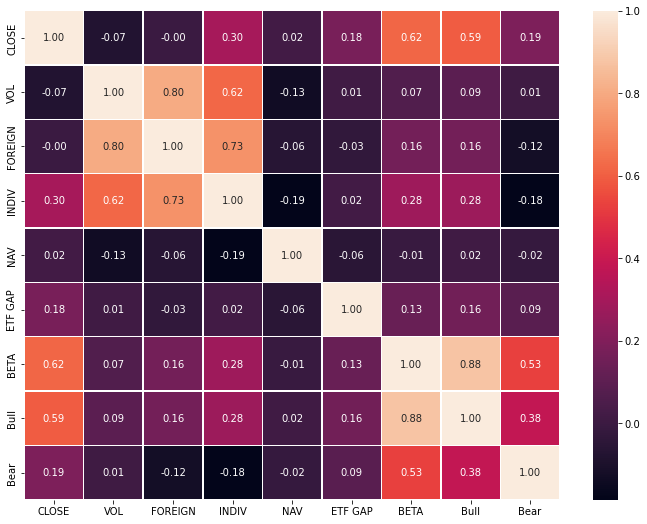

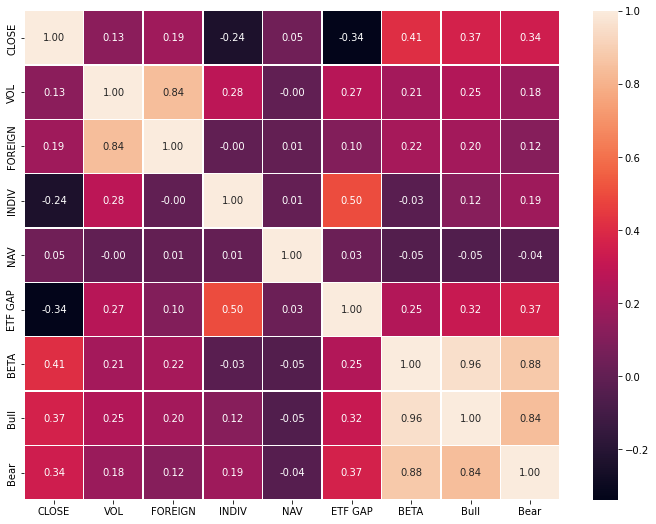

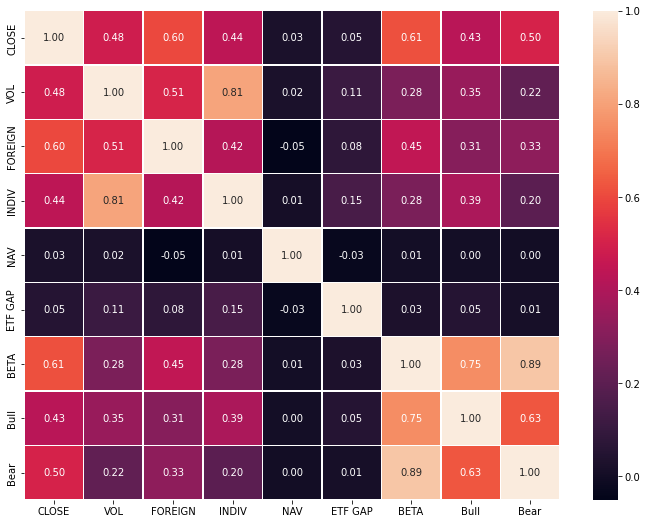

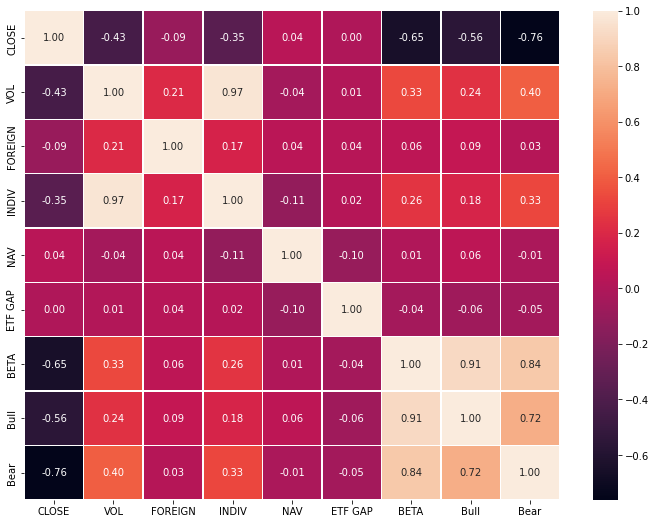

In [190]:
# 일단 전체 기간
for df in df_list:
  plt.figure(figsize = (12,9))
  sns.heatmap(data=df.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = .5)